In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from ResourceReservation import encode_float_filename
from ResourceReservation.MarkovModel import fisher_rao_distance_markov

In [2]:
dBparamsList = [
    [0.02],
    [0.04] 
]

N_numAggregatedTraffic = 9
lenWindowList = [10, 20]
avgUtilityListTotal = []
avgAosListTotal = []
maxAosListTotal = []
estAccListTotal = []
compressionRateListTotal = []

avgUtilityConstList = []
avgUtilityNpList = []
avgAosConstList = []
maxAosConstList = []
avgAosNpList = []
maxAosNpList = []

for mode in ["fixed"]:
    for i_direct, direction in enumerate(["forward"]):
        for lenWindow in lenWindowList:
            print(f"======== lenWindow ========")
            avgUtilityList = []
            avgAosList = []
            maxAosList = []
            estAccList = []
            compressionRateList = []
            for i_dbP, dbParams in enumerate(dBparamsList[i_direct]):
                dbpString = encode_float_filename(dbParams)
                for numAggregatedTraffic in [int(x) for x in np.linspace(2, int(lenWindow/2), N_numAggregatedTraffic)]:
                    print(f"======== {numAggregatedTraffic} ========")
                    saveFolder = f"Results/MdpEvaluation/{direction}/{mode}_{dbpString}/{lenWindow}"
                    with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsMdp.pkl", "rb") as file:
                        simResultsMdp = pickle.load(file)
                    with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsConst.pkl", "rb") as file:
                        simResultsConst = pickle.load(file)
                    with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsNp.pkl", "rb") as file:
                        simResultsNp = pickle.load(file)
                    saveFolder = f"Results/MdpPolicy/{direction}/{mode}_{dbpString}/{lenWindow}"
                    with open(f"{saveFolder}/results_{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
                        mdpParams = pickle.load(file)
                    with open(f"Results/MarkovModel/{direction}/{mode}_{dbpString}/{lenWindow}/{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
                        aggregateMarkovModel = pickle.load(file)

                    avgUtilityList.append(np.mean(simResultsMdp['simU_history']))
                    avgAosList.append(np.mean(simResultsMdp['simAoS_history']))
                    maxAosList.append(np.max(simResultsMdp['simAoS_history']))
                    estAccList.append(simResultsMdp['estAccuracy'])
                    compressionRateList.append(numAggregatedTraffic / (lenWindow))
                    print(f"Avg. Utiliy (Const): {np.mean(simResultsConst['simU_history'])}")
                    print(f"Avg. Utiliy (NP): {np.mean(simResultsNp['simU_history'])}")
                    print(f"Avg. Utiliy (Mdp): {np.mean(simResultsMdp['simU_history'])}")
                    print(f"Avg. AoS  (Const): {np.mean(simResultsConst['simAoS_history'])}")
                    print(f"Avg. AoS  (NP): {np.mean(simResultsNp['simAoS_history'])}")
                    print(f"Avg. AoS  (Mdp): {np.mean(simResultsMdp['simAoS_history'])}")
                    print(f"Max. AoS  (Const): {np.max(simResultsConst['simAoS_history'])}")
                    print(f"Max. AoS  (NP): {np.max(simResultsNp['simAoS_history'])}")
                    print(f"Max. AoS  (Mdp): {np.max(simResultsMdp['simAoS_history'])}")
                    print(f"Avg. cost (Const): {np.mean(simResultsConst['simCostWindow_history'])}")
                    print(f"Avg. cost (NP): {np.mean(simResultsNp['simCostWindow_history'])}")
                    print(f"Avg. cost (Mdp): {np.mean(simResultsMdp['simCostWindow_history'])}")

            avgUtilityListTotal.append(avgUtilityList)
            avgAosListTotal.append(avgAosList)
            maxAosListTotal.append(maxAosList)
            estAccListTotal.append(estAccList)
            compressionRateListTotal.append(compressionRateList)

            avgUtilityConstList.append(np.mean(simResultsConst['simU_history']))
            avgUtilityNpList.append(np.mean(simResultsNp['simU_history']))
            avgAosConstList.append(np.mean(simResultsConst['simAoS_history']))
            maxAosConstList.append(np.max(simResultsConst['simAoS_history']))
            avgAosNpList.append(np.mean(simResultsNp['simAoS_history']))
            maxAosNpList.append(np.max(simResultsNp['simAoS_history']))

======== lenWindow ========
======== 2 ========
Avg. Utiliy (Const): 0.9897021219512193
Avg. Utiliy (NP): 0.992964
Avg. Utiliy (Mdp): 0.7933650731707317
Avg. AoS  (Const): 0.8887804878048781
Avg. AoS  (NP): 0.8887804878048781
Avg. AoS  (Mdp): 0.2992682926829268
Max. AoS  (Const): 15
Max. AoS  (NP): 15
Max. AoS  (Mdp): 4
Avg. cost (Const): 0.9999999776482582
Avg. cost (NP): 1.159910534849254
Avg. cost (Mdp): 1.111414603287036
======== 2 ========
Avg. Utiliy (Const): 0.9897021219512193
Avg. Utiliy (NP): 0.992964
Avg. Utiliy (Mdp): 0.7933650731707317
Avg. AoS  (Const): 0.8887804878048781
Avg. AoS  (NP): 0.8887804878048781
Avg. AoS  (Mdp): 0.2992682926829268
Max. AoS  (Const): 15
Max. AoS  (NP): 15
Max. AoS  (Mdp): 4
Avg. cost (Const): 0.9999999776482582
Avg. cost (NP): 1.159910534849254
Avg. cost (Mdp): 1.111414603287036
======== 2 ========
Avg. Utiliy (Const): 0.9897021219512193
Avg. Utiliy (NP): 0.992964
Avg. Utiliy (Mdp): 0.7933650731707317
Avg. AoS  (Const): 0.8887804878048781
Avg. Ao

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_total(xList, yList, labelList, extraX=None, extraY=None, extra_label="Extra Line",
               figsize=(8, 6), regression_color='r', fontsize=12, title="X vs Y with Regression", ylabel="Y value", legendLoc="best"):
    
    markers = ['d', '^', 'v', 'p', '*', 'x']
    grayscale_colors = np.linspace(0.5, 0.7, len(xList))
    # Call the base function to get the Axes object
    ax = plot_regression_with_grayscale(xList, yList, labelList, figsize, regression_color, fontsize, title, ylabel)

    # Plot additional line if provided
    if extraX is not None and extraY is not None:
        for i, (x, y) in enumerate(zip(extraX, extraY)):
            ax.plot(x, y, linestyle='-', marker=markers[i], markersize=12, color=str(grayscale_colors[i]), linewidth=3, label=extra_label[i])

    # Show updated legend
    ax.legend(fontsize=int(fontsize * 0.8), loc=legendLoc)

    #plt.show()

def plot_regression_with_grayscale(xList, yList, labelList, figsize=(8, 6), regression_color='r', fontsize=12, title="X vs Y with Regression", ylabel="ylabel"):
    def linear_regression_line(x, y):
        x = np.array(x).flatten()
        y = np.array(y).flatten()

        # Compute coefficients
        A = np.vstack([x, np.ones_like(x)]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]

        # Compute the regression line points
        y_pred = m * x + c

        return x, y_pred
    
    markers = ['o', 's', 'd', '^', 'v', 'p', '*', 'x']
    linestyles = ['-', '--', '-.', ':']
    grayscale_colors = np.linspace(0.1, 0.5, len(xList))

    fig, ax = plt.subplots(figsize=figsize)

    for i in range(len(xList)):
        ax.plot(
            xList[i], 
            yList[i], 
            linestyle=linestyles[i % len(linestyles)], 
            marker=markers[i % len(markers)], 
            color=str(grayscale_colors[i]), 
            label=labelList[i],
            linewidth=3,
            markersize=12
        )

    # Compute and plot regression line
    x_reg, y_reg = linear_regression_line(np.concatenate(xList), np.concatenate(yList))
    ax.plot(x_reg, y_reg, color=regression_color, linewidth=3, label='Regression Line')
    plt.xticks(fontsize=fontsize-2)  # Set x-axis tick font size
    plt.yticks(fontsize=fontsize-2)  # Set y-axis tick font size

    ax.set_xlabel("Traffic compression rate", fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=int(fontsize * 0.8))

    return ax  # Return the Axes object for further modifications


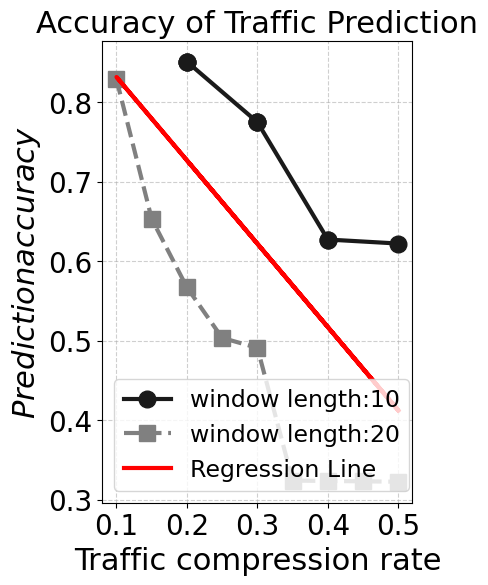

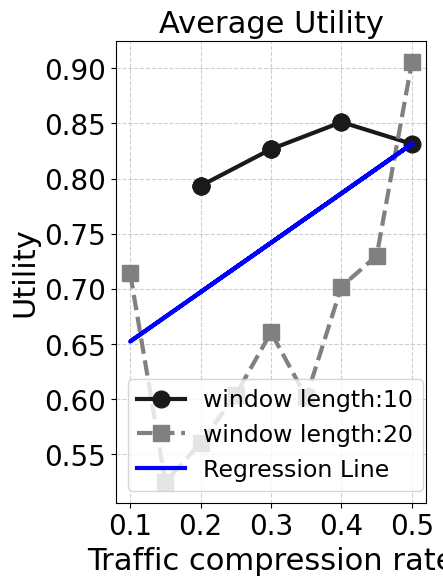

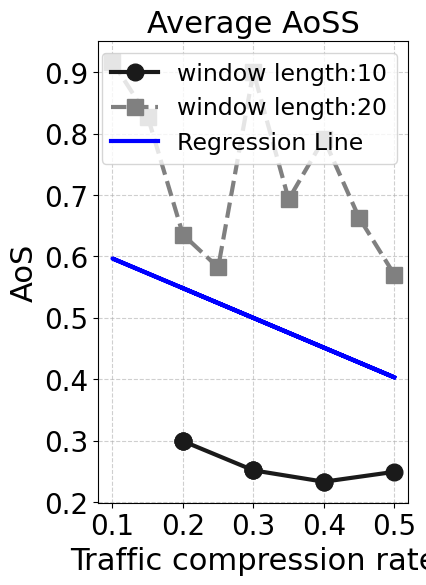

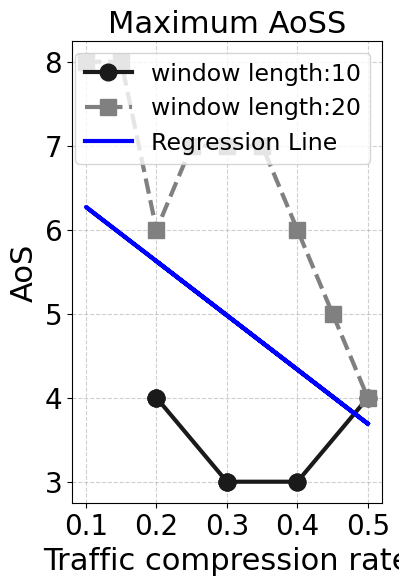

In [4]:
figsize = (4, 6)
fontsize = 22
#labelList = ["window length:10", "window length:20", "window length:30"]
labelList = ["window length:10", "window length:20"]
extra_label = ["Const", "NP"]

plot_regression_with_grayscale(
    compressionRateListTotal, estAccListTotal, labelList, figsize=figsize, regression_color='r', fontsize=fontsize, 
    ylabel="$Prediction accuracy$", title="Accuracy of Traffic Prediction")
plt.savefig("Figures/sim04a_accuracy.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 


plot_regression_with_grayscale(
    compressionRateListTotal, avgUtilityListTotal, labelList, figsize=figsize, regression_color='b', fontsize=fontsize, 
    ylabel="Utility", title="Average Utility")
plt.savefig("Figures/sim04b_avg_utility.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 


plot_total(
    compressionRateListTotal, avgAosListTotal, labelList, 
    figsize=figsize, regression_color='b', fontsize=fontsize, 
    ylabel="AoS",title="Average AoSS", legendLoc="upper right")
plt.savefig("Figures/sim04c_avg_aos.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 


plot_total(
    compressionRateListTotal, maxAosListTotal, labelList, 
    figsize=figsize, regression_color='b', fontsize=fontsize, 
    ylabel="AoS",title="Maximum AoSS", legendLoc="upper right")
plt.savefig("Figures/sim04d_max_aos.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 

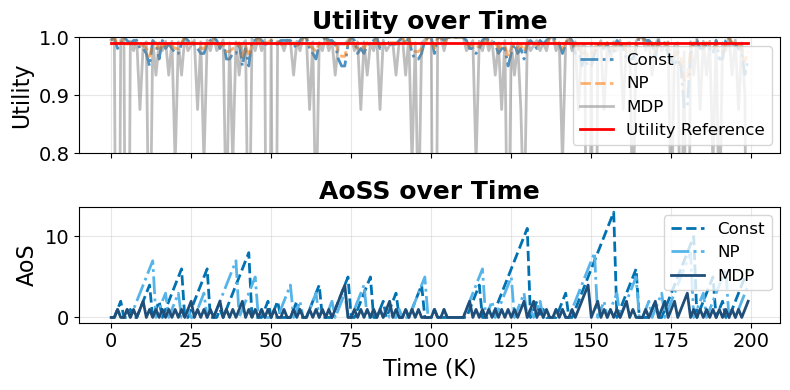

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

fontsize = 16
idx_obv = 200
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
markers = ['o', 's', 'd', '^', 'v', 'p', '*', 'x']

# Define a refined color palette
colors_ax1 = ['#1f77b4', '#ff7f0e', '#7f7f7f']  # Orange Family (Muted Professional Tones)
colors_ax2 = ['#0072B2', '#56B4E9', '#1F4E79']  # Blue Family (Soft and Elegant Blues)

# Plot simU_history on the first subplot (ax1) (Orange Family)

ax1.plot(simResultsConst['simU_history'][0:idx_obv], label='Const', linestyle='-.', color=colors_ax1[0], linewidth=2, alpha=0.8)
ax1.plot(simResultsNp['simU_history'][0:idx_obv], label='NP', linestyle='--', color=colors_ax1[1], linewidth=2, alpha=0.6)
ax1.plot(simResultsMdp['simU_history'][0:idx_obv], label='MDP', linestyle='-', color=colors_ax1[2], linewidth=2, alpha=0.5)

# Plot the reference utility line
ax1.plot(mdpParams['utility_ref'] * np.ones_like(simResultsMdp['simU_history'][0:idx_obv]),
         label='Utility Reference', linestyle='-', color='r', linewidth=2)

ax1.set_ylim(0.8, 1)
#ax1.set_xlabel('Time Steps', fontsize=fontsize)
ax1.set_ylabel('Utility', fontsize=fontsize)
ax1.legend(loc='lower right', fontsize=fontsize-4, frameon=True)
ax1.grid(alpha=0.3)
ax1.set_title('Utility over Time', fontsize=fontsize+2, fontweight='bold')
ax1.tick_params(axis='x', labelsize=fontsize-2)
ax1.tick_params(axis='y', labelsize=fontsize-2)
# Plot simAoS_history on the second subplot (ax2) (Blue Family)

ax2.plot(simResultsConst['simAoS_history'][0:idx_obv], label='Const', linestyle='--', color=colors_ax2[0], linewidth=2)
ax2.plot(simResultsNp['simAoS_history'][0:idx_obv], label='NP', linestyle='-.', color=colors_ax2[1], linewidth=2)
ax2.plot(simResultsMdp['simAoS_history'][0:idx_obv], label='MDP', linestyle='-', color=colors_ax2[2], linewidth=2)

ax2.set_xlabel('Time (K)', fontsize=fontsize)
ax2.set_ylabel('AoS', fontsize=fontsize)
ax2.legend(loc='upper right', fontsize=fontsize-4, frameon=True)
ax2.grid(alpha=0.3)
ax2.set_title('AoSS over Time', fontsize=fontsize+2, fontweight='bold')
ax2.tick_params(axis='x', labelsize=fontsize-2)
ax2.tick_params(axis='y', labelsize=fontsize-2)

plt.tight_layout()
#plt.show()
plt.savefig("Figures/sim05a.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 



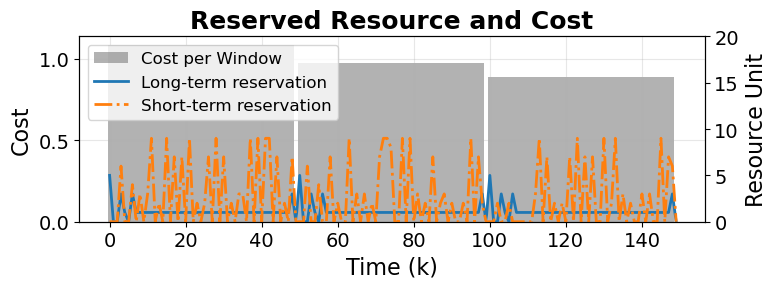

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Define parameters
N_period = 3
len_period = 50
idx_obv = N_period*len_period  # Total observations for the line plots
fontsize = 16

# Create x_bar positions for the bars:
# This expression creates 10 positions spaced by len_window and then shifts them by floor(len_window/2)-1.
x_bar = np.array(range(0, N_period*len_period, len_period)) + np.floor(len_period/2) - 1
bar_width =len_period-1

# Create the figure and primary axis for cost window data (ax4)
fig2, ax4 = plt.subplots(figsize=(8, 3))

# Plot simCostWindow_history as a bar graph on the primary axis (ax4)
# Note: Using the first 10 elements of simCostWindow_history to match the length of x_bar.
ax4.bar(x_bar, simResultsMdp['simCostWindow_history'][0:N_period],
        label='Cost per Window',
        color='#7f7f7f',
        alpha=0.6,
        width=bar_width)
ax4.tick_params(axis='x', labelsize=fontsize-2)
ax4.tick_params(axis='y', labelsize=fontsize-2)

# Plot the mean cost as a dashed horizontal line across the bar positions
'''
mean_cost = np.mean(simResultsMdp['simCostWindow_history'])
ax4.plot(x_bar, mean_cost * np.ones(len(x_bar)),
         label='Avg. Cost',
         color=colors[3],
         linestyle='dashed',
         linewidth=2)
'''
ax4.set_ylabel("Cost", fontsize=fontsize)
ax4.set_xlabel("Time (k)", fontsize=fontsize)
# Create a twin axis for the traffic load and position data (ax3)
ax3 = ax4.twinx()
ax3.plot(simResultsMdp['simX_history'][0:idx_obv],
         label='Long-term reservation',
         color=colors[0],
         linewidth=2)
ax3.plot(simResultsMdp['simY_history'][0:idx_obv],
         label='Short-term reservation',
         color=colors[1],
         linewidth=2,
         linestyle="-.")

ax3.set_ylabel("Resource Unit", fontsize=fontsize)
ax3.set_title("Reserved Resource and Cost", fontsize=fontsize+2, fontweight='bold')
ax3.set_ylim(0, 20)
ax3.tick_params(axis='x', labelsize=fontsize-2)
ax3.tick_params(axis='y', labelsize=fontsize-2)
# Combine legends from both axes
lines4, labels4 = ax4.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax4.legend(lines4 + lines3, labels4 + labels3, loc="upper left", fontsize=fontsize-4)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("Figures/reserved_resource_and_cost.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
#plt.show()
plt.savefig("Figures/sim05b.png", bbox_inches='tight', pad_inches=0.1, dpi=300) 